In [ ]:
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 22.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas: filename=pandas-1.3.5-cp312-cp312-linux_x86_64.whl size=40409741 sha256=262bc967eead33ddfed24d1d78c5a123916db868ea8f3ce99a1b99ff328a0589
  Stored in directory: /root/.cache/pip/wheels/e3/15/7f/43571d4c48966d63f4f7a640e9345b57e23f1656d4d5b81b16
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.3.5 which is incompatible.
db-dtypes 1.4.3 requires pandas>=1.5.3, but you have pandas 1.3.5 whi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Set dataset path (change "fraud_data" to your actual folder name in Drive)
import os
data_path = "/content/drive/MyDrive/DataSets/data"  # <- adjust this
os.listdir(data_path)[:10]  # preview first 10 files

# STEP 3: Load all .pkl files into a list of DataFrames
import pandas as pd
import glob

all_df_list = []

for file in glob.glob(os.path.join(data_path, "*.pkl")):
    try:
        df = pd.read_pickle(file)
        all_df_list.append(df)
        print(f"Loaded {file} -> shape: {df.shape}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# STEP 4: Merge into one big DataFrame
fraud_df = pd.concat(all_df_list, ignore_index=True)
print("\n✅ Final merged dataset shape:", fraud_df.shape)

# STEP 5: Quick dataset summary
print("\n📊 Dataset Info:")
print(fraud_df.info())

print("\n🔍 Missing values per column:")
print(fraud_df.isnull().sum().sort_values(ascending=False).head(10))

print("\n📌 First 5 rows:")
print(fraud_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded /content/drive/MyDrive/DataSets/data/2018-04-01.pkl -> shape: (9488, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-12.pkl -> shape: (9541, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-19.pkl -> shape: (9539, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-02.pkl -> shape: (9583, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-07.pkl -> shape: (9438, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-10.pkl -> shape: (9672, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-13.pkl -> shape: (9753, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-14.pkl -> shape: (9557, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-15.pkl -> shape: (9478, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-18.pkl -> shape: (9616, 9)
Loaded /content/drive/MyDrive/DataSets/data/2018-04-03.pkl -> shape: (9747, 9)
Lo

In [3]:
# STEP 6: Save merged dataset as CSV in Google Drive
output_path = "/content/drive/MyDrive/fraud_dataset.csv"  # change path if needed
fraud_df.to_csv(output_path, index=False)

print(f"✅ CSV file saved at: {output_path}")


✅ CSV file saved at: /content/drive/MyDrive/fraud_dataset.csv


In [4]:
fraud_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [5]:
fraud_df.shape

(1754155, 9)

In [6]:
df.columns


Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

##  EDA and Diagnostics

In [8]:
import pandas as pd, numpy as np
pd.options.display.max_columns = 200


print("shape:", fraud_df.shape)
print(fraud_df.columns.tolist())
print(fraud_df['TX_FRAUD'].value_counts(dropna=False))
fraud_df['TX_DATETIME'] = pd.to_datetime(fraud_df['TX_DATETIME'])
print("date range:", fraud_df['TX_DATETIME'].min(), "->", fraud_df['TX_DATETIME'].max())
print(fraud_df.isna().sum())


shape: (1754155, 9)
['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD', 'TX_FRAUD_SCENARIO']
TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64
date range: 2018-04-01 00:00:31 -> 2018-09-30 23:59:57
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64


In [10]:
# reduce memory
def reduce_mem(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        if pd.api.types.is_float_dtype(df[col]):
            df[col] = pd.to_numeric(df[col], downcast='float')
        else:
            df[col] = pd.to_numeric(df[col], downcast='integer')
    for col in df.select_dtypes(include=['object']).columns:
        nunique = df[col].nunique()
        if nunique < 0.5 * len(df):
            df[col] = df[col].astype('category')
    return df

In [11]:

fraud_df = reduce_mem(fraud_df)
fraud_df['CUSTOMER_ID'] = fraud_df['CUSTOMER_ID'].astype('category')
fraud_df['TERMINAL_ID'] = fraud_df['TERMINAL_ID'].astype('category')
fraud_df['TX_FRAUD'] = fraud_df['TX_FRAUD'].astype('int8')

print("After dtype optimization:")
print(fraud_df.dtypes.value_counts())

After dtype optimization:
int8              2
int32             1
category          1
datetime64[ns]    1
category          1
float32           1
object            1
category          1
Name: count, dtype: int64


In [12]:
# Time-based features
fraud_df['hour'] = fraud_df['TX_DATETIME'].dt.hour.astype('int8')
fraud_df['weekday'] = fraud_df['TX_DATETIME'].dt.weekday.astype('int8')
fraud_df['day'] = fraud_df['TX_DATETIME'].dt.day.astype('int8')
fraud_df['month'] = fraud_df['TX_DATETIME'].dt.month.astype('int8')

# Amount transforms
fraud_df['amt_log1p'] = np.log1p(fraud_df['TX_AMOUNT']).astype('float32')
fraud_df['is_large_amt'] = (fraud_df['TX_AMOUNT'] > 220).astype('int8')  # direct scenario hint


In [15]:
# Customer-level aggregated features
fraud_df['cust_mean_amt'] = (
    fraud_df.groupby('CUSTOMER_ID', observed=False)['TX_AMOUNT']
    .transform('mean').astype('float32')
)

fraud_df['cust_std_amt'] = (
    fraud_df.groupby('CUSTOMER_ID', observed=False)['TX_AMOUNT']
    .transform('std').fillna(0).astype('float32')
)

fraud_df['cust_tx_count'] = (
    fraud_df.groupby('CUSTOMER_ID', observed=False)['TX_AMOUNT']
    .transform('count').astype('int32')
)

# Terminal-level aggregated features
fraud_df['term_mean_amt'] = (
    fraud_df.groupby('TERMINAL_ID', observed=False)['TX_AMOUNT']
    .transform('mean').astype('float32')
)

fraud_df['term_std_amt'] = (
    fraud_df.groupby('TERMINAL_ID', observed=False)['TX_AMOUNT']
    .transform('std').fillna(0).astype('float32')
)

fraud_df['term_tx_count'] = (
    fraud_df.groupby('TERMINAL_ID', observed=False)['TX_AMOUNT']
    .transform('count').astype('int32')
)



In [16]:
# Sort groups before computing cumulative features
fraud_df = fraud_df.sort_values(['CUSTOMER_ID','TX_DATETIME'])

# Previous transactions by this customer
fraud_df['cust_prev_tx_count'] = (
    fraud_df.groupby('CUSTOMER_ID', observed=False).cumcount().astype('int32')
)

# Previous frauds by this customer (past only)
fraud_df['cust_prev_frauds'] = (
    fraud_df.groupby('CUSTOMER_ID', observed=False)['TX_FRAUD'].cumsum() - fraud_df['TX_FRAUD']
).astype('int32')

# Time since previous customer transaction (seconds)
fraud_df['cust_prev_time'] = fraud_df.groupby('CUSTOMER_ID', observed=False)['TX_DATETIME'].shift(1)
fraud_df['cust_time_since_prev_s'] = (
    fraud_df['TX_DATETIME'] - fraud_df['cust_prev_time']
).dt.total_seconds().fillna(-1).astype('float32')
fraud_df = fraud_df.drop(columns=['cust_prev_time'])

# Terminal cumulative features
fraud_df = fraud_df.sort_values(['TERMINAL_ID','TX_DATETIME'])

fraud_df['term_prev_tx_count'] = (
    fraud_df.groupby('TERMINAL_ID', observed=False).cumcount().astype('int32')
)

fraud_df['term_prev_frauds'] = (
    fraud_df.groupby('TERMINAL_ID', observed=False)['TX_FRAUD'].cumsum() - fraud_df['TX_FRAUD']
).astype('int32')


In [17]:
# Define feature columns (exclude identifiers, datetime, and raw text columns)
feature_cols = [
    'TX_AMOUNT',
    'cust_mean_amt','cust_std_amt','cust_tx_count',
    'term_mean_amt','term_std_amt','term_tx_count',
    'cust_prev_tx_count','cust_prev_frauds','cust_time_since_prev_s',
    'term_prev_tx_count','term_prev_frauds'
]

X = fraud_df[feature_cols]
y = fraud_df['TX_FRAUD']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    class_weight='balanced',   # ⚡ handles fraud imbalance
    random_state=42
)

lgb_clf.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 11745, number of negative: 1391579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2621
[LightGBM] [Info] Number of data points in the train set: 1403324, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=500,
               random_state=42)

In [22]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = lgb_clf.predict(X_test)
y_proba = lgb_clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    347895
           1       0.30      0.93      0.45      2936

    accuracy                           0.98    350831
   macro avg       0.65      0.95      0.72    350831
weighted avg       0.99      0.98      0.99    350831

ROC-AUC: 0.9869600069988858


In [23]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Example: choose threshold where precision ~0.6
best_thresh = thresholds[np.argmax(precisions >= 0.6)]
print("Chosen threshold:", best_thresh)

y_pred_thresh = (y_proba >= best_thresh).astype(int)
print(classification_report(y_test, y_pred_thresh))


Chosen threshold: 0.8234298080672914
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    347895
           1       0.60      0.89      0.72      2936

    accuracy                           0.99    350831
   macro avg       0.80      0.94      0.86    350831
weighted avg       1.00      0.99      0.99    350831



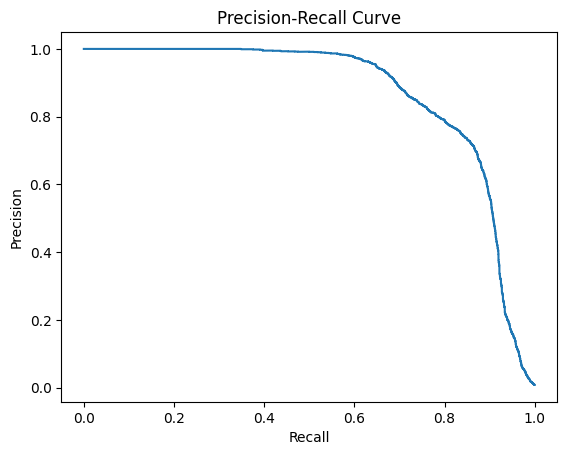

In [24]:
import matplotlib.pyplot as plt

plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [25]:
from sklearn.metrics import average_precision_score

ap_score = average_precision_score(y_test, y_proba)
print("Average Precision Score:", ap_score)


Average Precision Score: 0.8675796398544936
